## Data Mining: Lab 3 - examples - classification models / exemple - modele de clasificare

Objectives: 
1. getting familiar with classification models / Obiective: familiarizare cu modele de clasificare
     * Decision Trees and Classification Rules / Arbori de decizie si reguli de clasificare
     * k Nearest Neighbours / Modele bazate pe cei mai apropiati vecini
     * Naive Bayes / Classificator Bayesian naiv
     * Support Vector Machines / Clasificatori bazati pe vectori suport
     * Multilayer Perceptrons / Retele neuronale de tip perceptron multinivel
1. evaluating the performance of a classifier / evaluarea performantei unui clasificator
     * performance measures / masuri de performanta
     * cross validation / validare inc

#### Importing general libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff    # for arff files / pt fisiere arff
import matplotlib.pyplot as plt

### 0. Introduction: get familiar with the scikit-learn  classification models / familiarizare cu modelele de clasificare implementate in scikit-learn
 * https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

In [7]:
# Adaptation of the code: Gaël Varoquaux,  Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
#from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
h = 0.02  # step size in the mesh
names = [
    "DT",
    "kNN",
    "NB",
    "LinSVM",
    "RBF-SVM",
    "MLP"  
]
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    KNeighborsClassifier(3),
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    MLPClassifier(alpha=1, max_iter=1000)
]

In [8]:
# Synthetic datasets (2D) / Seturi de date sintetice
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]
figure = plt.figure(figsize=(21, 9))

<Figure size 2100x900 with 0 Axes>

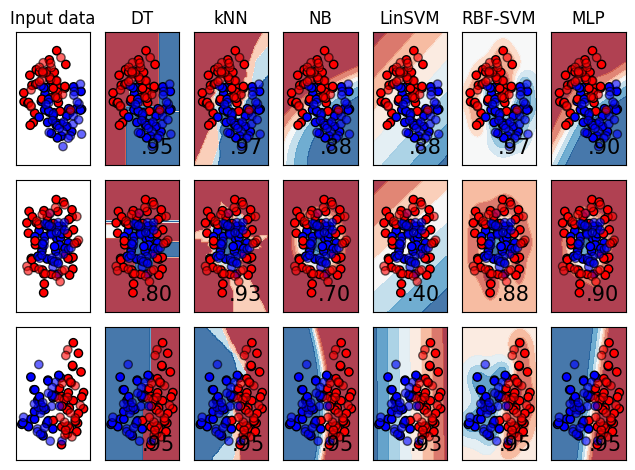

In [9]:
i = 1
# iterate over datasets / parcurgere seturi de date
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training (60%) and test part (40%) / partitionare set date: antrenare (60%) si testare (40%)
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers / parcurgere modele
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        # define a pipeline that includes the pre-processing (standardizatio) + classifier / 
        # definirea unui flux de prelucrări care include pre-procesarea (standardizare)+ clasificator
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)            # training / antrenare
        score = clf.score(X_test, y_test)    # accuracy computing on testind set / calcul acuratete pe setul de testare
        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)
        # Plot the training points / vizualizare date de antrenare
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points / Vizualizare date de testare
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(x_max - 0.3, y_min + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")
        i += 1

plt.tight_layout()
plt.show()

### 1. Decision trees / Arbori de decizie
 * they rely on the idea of recursively splitting the dataset based, at each step, on the values of the currently most relevant attribute
 * the relevance is measured using Gini index or the information gain
 * the recursive splitting process continue until a given tree depth is reached or until the dataset corresponding to the node has a small enough number of elements

In [11]:
from pandas import read_csv
dataBreastCancerW = read_csv('./datasets/lab3/breast-w.csv')
dataBreastCancerW = dataBreastCancerW.dropna()

In [12]:
dataBreastCancerW

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,benign
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,benign
695,2,1,1,1,2,1,1,1,1,benign
696,5,10,10,3,7,3,8,10,2,malignant
697,4,8,6,4,3,4,10,6,1,malignant


In [13]:
# extract the names of the attributes / extragerea numelor atributelor
attrNames=list(dataBreastCancerW.columns) 

In [14]:
# decision trees class / arbori de decizie
from sklearn import tree

In [15]:
# extract the predictive attributes and the class attribute
X, y = dataBreastCancerW.values[:,0:9], dataBreastCancerW.values[:,9]

In [16]:
# Rmk:  the data should be numerical /  datele trebuie sa fie numerice
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()
enc.fit(y.reshape(-1,1))  # OrdinalEncoder expect an 2D array / OrdinalEncoder asteapta tablou 2D
y2=enc.transform(y.reshape(-1,1)).flatten()
enc.fit(X)
X2=enc.transform(X)

In [17]:
# training and testing dataset (60% training, 40% testing) / partitionare in set de antrenare si testare (60% antrenare, 40% testare)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.4, random_state=42)

In [18]:
# construction of the classifier (default values of the parameters) / construirea clasificatorului
clfDT = tree.DecisionTreeClassifier()
clfDT = clfDT.fit(X_train, y_train)  # training / antrenare

In [23]:
from sklearn import metrics
pred = clfDT.predict(X_test) # prediction on testing dataset / predictie pe setul de testare
clfDT_fpr, clfDT_tpr, clfDT_thresholds = metrics.roc_curve(y_test, pred) # compute coordinates of ROC curve points / calcul coordonate puncte de pe curba ROC
clfDT_auc = metrics.auc(clfDT_fpr, clfDT_tpr)  # area under the curve / calcul AuC
clfDT_acc = clfDT.score(X_test, y_test)
print("fpr=", clfDT_fpr, "tpr=", clfDT_tpr, "thresholds=", clfDT_thresholds, "AuC=",clfDT_auc, "Accuracy=", clfDT_acc)
clfDT_CM = metrics.confusion_matrix(y_test, pred)
print("CM=", clfDT_CM)

fpr= [0.         0.03243243 1.        ] tpr= [0.         0.88421053 1.        ] thresholds= [inf  1.  0.] AuC= 0.9258890469416786 Accuracy= 0.9392857142857143
CM= [[179   6]
 [ 11  84]]


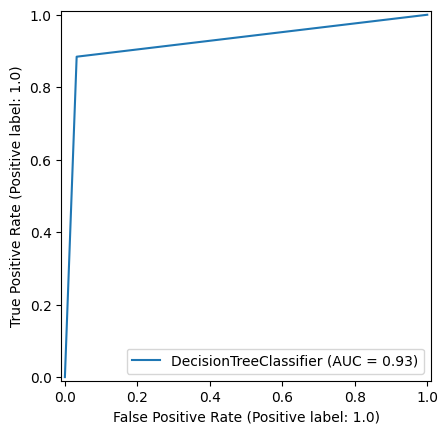

In [20]:
metrics.RocCurveDisplay.from_estimator(clfDT, X_test, y_test)
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=["Benign", "Malignant"]))

              precision    recall  f1-score   support

      Benign       0.94      0.97      0.95       185
   Malignant       0.93      0.88      0.91        95

    accuracy                           0.94       280
   macro avg       0.94      0.93      0.93       280
weighted avg       0.94      0.94      0.94       280



#### Remark:  different ways of computing the averages in multiple classification (arbitrary number of classes)
 * "macro" = each class will have the same contribution (weight) to the average disregarding its size; the macro average is the arithmetic mean of the individual class related to precision, memory, and f1 score.
 * "weighted= it " accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample. * 

"mic= each instance will have the same contribution (weight) to the average; e.g. the micro average precision is the sum of true positives for a single class divided by the sum of predicted positives for all classes.red.

In [30]:
# evaluation of the classification model using cross-validation
from sklearn.model_selection import cross_val_score
clfDT_CV = tree.DecisionTreeClassifier()
accuracy_CV10 = cross_val_score(clfDT_CV, X2, y2, cv=20)  
print("mean acc=",np.mean(accuracy_CV10), "stdev acc=", np.std(accuracy_CV10))

mean acc= 0.9385714285714286 stdev acc= 0.03862430238455937


#### Exercise 1 (Classification trees for breast-w dataset)

 * Using the confusion matrix compute the sensitivity, specificity, recall, precision and F1-score for clfDT and compare with those reported in the Classification Report/ Calculati sensitivitatea, senzitivitatea, precizia, rata de regasire si scorul F1 folosind matricea de confuzie si comparati cu valorile returnate de classification_report
 * Analyze the influence of the number of folds on the metrics obtained by cross-validation (cv in {5, 10, 20})
 * Identify the most relevant attribute. Hint: use clfDT.feature_importances_  to collect the importance of each attribute (higher value means higher importance)
 * Analyze the influence of the following parameters of DecisionTreeClassifier (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier)
   * splitting ''criterion'': {"gini", "entropy", "log_loss"}
   * ''splitter'' variant:  {"best", "random"}

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
print(cm)

TN, FP, FN, TP = cm.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'Precision: {precision}')
print(f'F1-score: {f1_score}')
print(f'Recall: {recall}')

[[179   6]
 [ 11  84]]
Sensitivity: 0.8842105263157894
Specificity: 0.9675675675675676
Precision: 0.9333333333333333
F1-score: 0.9081081081081082
Recall: 0.8842105263157894


In [31]:
# Hint: Identify the most relevant attribute
dfAttrImportance = pd.DataFrame({"Attr":attrNames[:-1], "Importance":clfDT.feature_importances_})
dfAttrImportance.sort_values(by=['Importance'], ascending = False)
# Which is the most important attribute?
# ...

,Attr,Importance
2,Cell_Shape_Uniformity,0.724968
6,Bland_Chromatin,0.100798
5,Bare_Nuclei,0.063311
0,Clump_Thickness,0.051053
4,Single_Epi_Cell_Size,0.028260
7,Normal_Nucleoli,0.027522
3,Marginal_Adhesion,0.004088
1,Cell_Size_Uniformity,0.000000
8,Mitoses,0.000000


In [38]:
# Hint:  Analyze the influence of criterion and splitter
crit = ["gini", "entropy", "log_loss"]
split = ["best", "random"]
for c in crit:
    for s in split:
        clfDT = tree.DecisionTreeClassifier(criterion=c, splitter=s)
        clfDT = clfDT.fit(X_train, y_train) 
        print("criterion=",c," split=",s," acc=",clfDT.score(X_test,y_test))
# Run the above sequence 5 times and compare the results;  What do you observe?              
...

criterion= gini  split= best  acc= 0.9285714285714286
criterion= gini  split= random  acc= 0.9214285714285714
criterion= entropy  split= best  acc= 0.9428571428571428
criterion= entropy  split= random  acc= 0.9535714285714286
criterion= log_loss  split= best  acc= 0.9392857142857143
criterion= log_loss  split= random  acc= 0.925


Ellipsis

####  Decision trees:  visualization and extraction of rules

In [44]:
# visualization of the tree / vizualizarea arborelului
import graphviz 
dot_data = tree.export_graphviz(clfDT, out_file=None) 
graph = graphviz.Source(dot_data) 
graph
graph.render("DT_BCW1") 

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [43]:
# visualization with additional options / altă variantă de vizualizare
dot_data = tree.export_graphviz(clfDT, out_file=None, 
                     feature_names=attrNames[0:9],  
                     class_names=['benign','malignant'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
graph.render("DT_BCW2") 

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

#### Question: 
 * How many classification rules can be extracted? /  Cate reguli de clasificare pot fi extrase din arbore? 
 * Which is the "longest" rule? / Care este cea mai lunga regula?

In [ ]:
# textual representation of the decision tree / vizualizare ca text
text_representation = tree.export_text(clfDT,
                     feature_names=attrNames[0:9])
print(text_representation)

#### Decision Trees:  extract the classification rules from a tree / extragerea regulilor de clasificare din arbore

In [45]:
# extracting rules from a decision tree
# based on https://mljar.com/blog/extract-rules-decision-tree/
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [47]:
rules_clfDT = get_rules(clfDT, attrNames[0:9], ['benign','malignant'])
rules_clfDT

['if ( Single_Epi_Cell_Size <= 1.419) and ( Marginal_Adhesion <= 4.215) and ( Cell_Shape_Uniformity <= 3.022) and ( Bare_Nuclei <= 4.581) and ( Normal_Nucleoli <= 0.812) then class: benign (proba: 100.0%) | based on 219 samples',
 'if ( Single_Epi_Cell_Size > 1.419) and ( Cell_Shape_Uniformity > 0.159) and ( Bare_Nuclei > 0.035) and (Clump_Thickness > 5.503) then class: malignant (proba: 100.0%) | based on 77 samples',
 'if ( Single_Epi_Cell_Size > 1.419) and ( Cell_Shape_Uniformity > 0.159) and ( Bare_Nuclei > 0.035) and (Clump_Thickness <= 5.503) and ( Cell_Shape_Uniformity <= 8.744) and ( Single_Epi_Cell_Size <= 7.448) and ( Bare_Nuclei <= 9.846) and ( Bland_Chromatin > 3.29) and ( Cell_Shape_Uniformity > 4.784) then class: malignant (proba: 100.0%) | based on 16 samples',
 'if ( Single_Epi_Cell_Size <= 1.419) and ( Marginal_Adhesion <= 4.215) and ( Cell_Shape_Uniformity <= 3.022) and ( Bare_Nuclei <= 4.581) and ( Normal_Nucleoli > 0.812) and ( Bare_Nuclei <= 2.918) then class: beni

#### Question: 
 * How many classification rules can be extracted? /  Cate reguli de clasificare pot fi extrase din arbore? 
 * Which rule has the larges support? / Care regula are cel mai mare suport?
 * Which is its support? / Care este suportul regulii?

### 2. k Nearest Neighbours  
 * the training process consists just in storing the training data
 * during the prediction stage the output class is the dominant class established based on the k closest elements from the training dataset
 * scikit learn implementation:  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

In [48]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
# class prediction
res_kNN=kNN.predict(X_test)
res_kNN

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1.

In [50]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
CM_kNN=confusion_matrix(y_test, res_kNN)
CM_kNN

array([[180,   5],
       [  3,  92]])

In [51]:
# probability distribution of the outputs corresponding to the neighbours / distributia de probabilitate  
print(kNN.predict_proba(X_test))

[[1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.4 0.6]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.4 0.6]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.6 0.4]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.2 0.8]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]

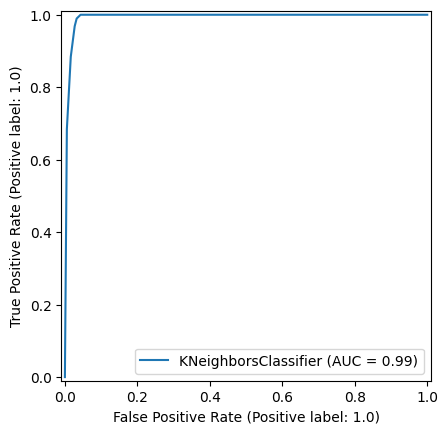

In [52]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(kNN, X_test, y_test)
plt.show()

#### Exercise 2 (kNN for breast-w dataset):  
 * Compare the accuracy of the kNN for k in {3,5,7,9} using cross-validation with 10 folds / Comparati acuratetea pentru k in {3,5,7,9} folosind tehnica validarii incrucisate cu 10 felii

In [53]:
# Hint:  
from sklearn.model_selection import cross_val_score
for k in [3,5,7,9]:
    clfkNN_CV = KNeighborsClassifier(n_neighbors=k)
    acckNN_CV = cross_val_score(clfkNN_CV, X2, y2, cv=10) 
    print("k=",k,"mean acc=",np.mean(acckNN_CV), "stdev acc=", np.std(acckNN_CV))

k= 3 mean acc= 0.9614078674948242 stdev acc= 0.039910848014757874
k= 5 mean acc= 0.9614078674948241 stdev acc= 0.029983299322067506
k= 7 mean acc= 0.9628364389233954 stdev acc= 0.0300862068282578
k= 9 mean acc= 0.9599792960662527 stdev acc= 0.030488544226286562


#### Variant: Explicit identification of neighbours using KDTree algorithm / Determinare explicita a vecinilor utilizand KDtree

In [54]:
# using KD-trees to make the search of the neighbors more efficient / stocare set de antrenare in arbore KD (pt eficientizarea cautarii)
from sklearn.neighbors import KDTree
kdtree = KDTree(X_train, leaf_size=2)              
dist, ind = kdtree.query(X_test[:1], k=5)  # find closest k neighbours / determinarea celor mai apropiati k vecini              
print(ind)  # indices of k closest neighbors / indicii celor mai apropiate k elemente din X_train
print(dist)  # distances to k closest neighbors / distantele la cei mai apropiati vecini

[[176  55 159 223 342]]
[[2.44948974 2.44948974 5.19615242 5.19615242 5.56776436]]


In [ ]:
# classes of the closest elements in the training set to X_test[1]
print("Classes for closest neighbors:", y_train[ind])
print("True class for X_test[1]:", y_test[1])

#### Exercise 3 (kNN for breast-w dataset):  
 * Q1. Write an implementation of kNN using KDTree / Scrieti o implementare a kNN folosind KDTree
 * Hint:  find the dominant clas from y_train[ind]  / se determina clasa dominanta din y_train[ind]

### 3. Naive Bayes classifier / clasificator probabilist
 * it relies on the computation of conditional probabilities / se bazeaza pe calculul unor probabilitati conditionate
 * the "naive" version is based on the simplifying assumption that the attributes are independent / varianta naiva se bazeaza pe ipoteza de independenta intre atribute
 * scikit implementation:
   * binary features: BernoulliNB - https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
   * discrete attributes with multiple values: MultinomialNB - https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
   * continuous attributes: GaussianNB https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # for categorical or discrete numerical attributes
clfNB = MultinomialNB()
clfNB.fit(X_train, y_train)

In [ ]:
res_clfNB=clfNB.predict(X_test)
res_clfNB

In [ ]:
clfNB.score(X_test,y_test)

In [ ]:
from sklearn.naive_bayes import BernoulliNB  # for binary attributes
# the predictive attributes should be binarized (binarization threshold is set through binarize)
# atributele predictive trebuie binarizate (pragul se stabileste folosind optiunea binarize)
clfNBB = BernoulliNB(binarize=5) # for breast-w dataset the threshold should be in [0,10]
clfNBB.fit(X_train, y_train)

In [ ]:
clfNBB.score(X_test,y_test)

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(clfNBB, X_test, y_test)
plt.show()

#### Exercise 4 (Naive Bayes for breast-w dataset):  
 * Q1. analyze the influence of the threshold used for binarization in BernoulliNB and identify the variant with the highest accuracy on the test dataset / analizati influenta pragului folosit pt binarizare in BernoulliNB si determinati varianta cu cea mai mare acuratete pe setul de testare
 * Q2. evaluate the accuracy using  cross-validation (with 10 folds) / evaluati acuratetea folosind validare incrucisata (cu 10 felii)

In [ ]:
# hint for Q1 / indicatie pt Q1
for i in range(0,11):
    clfNBB = BernoulliNB(binarize=i) # threshold should be in [0,10]
    clfNBB.fit(X_train, y_train)
    print("threshold=",i,"acc=",clfNBB.score(X_test,y_test))

### 4. Support Vector Machines (EN)
 * Support Vector Machines rely on the idea of identifying a decision surface which separates the classes such that a large margin between the classes is ensured (it is supposed that the predictive attributes are numerical).
 *  The margin borders are defined by some of the elements of the training dataset which are called support vectors.
 *  The coefficients of the decision surface are computed by solving a quadratic optimization problem with constraints (for which there are well established solvers in mathematical programming).
 *  In order to ensure the generalization capacity some relaxation conditions can be imposed using so-called slack variables – the magnitude of slack variables is controlled through a hyper-parameter (C).
 *  To obtain nonlinear decision surfaces nonlinear kernel functions are used: (i) radial basis function ('rbf'); (ii) polynomial ('poly'); (iii) sigmoid ('sigmoid')
 *  The choice of C and of the kernel function are the main design decision in the case of SVMs.
 *  
SVMs are designed for binary classification and they can be extended to multiple classes by applying either one-vs-one (for each pair of classes is constructed a classifier) or one-vs-all (for each class is constructed a classifie strategies
 *  * scikit learn function: svm.SVC - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

### 4. Support Vector Machines (RO)
 * Clasificatorii bazati pe vectori suport folosesc ideea identificării unei suprafețe de decizie 
care separă clasele astfel încât să se asigure o marjă mare între clase (se presupune că atributele predictive sunt numerice).
 * Marginile zonei de delimitare dintre clase sunt definite de unele elemente din setul de date de antrenare care se numesc vectori suport.
 * Coeficienții suprafeței de decizie sunt calculați prin rezolvarea unei probleme de optimizare pătratică cu constrângeri (pentru care există algoritmi eficienti în programarea matematică).
 * Pentru a asigura capacitatea de generalizare, se pot impune anumite condiții de relaxare prin intermediul așa-numitelor variabile de relaxare - mărimea variabilelor de relaxare este controlată printr-un hiperparametru (C).
 * Pentru a obține suprafețe de decizie neliniare se utilizează funcții nucleu neliniare: (i) funcție cu simetrie radială ("rbf"); (ii) polinomală ("poly"); (iii) sigmoidă ("sigmoid").
 * Alegerea lui C și a funcției nucleu reprezintă principala decizie de proiectare în cazul SVM-urilor.
 * SVM-urile sunt concepute pentru probleme de clasificare binara si pot fi extinse pentru clasificare multipla prin reducerea la mai multe probleme de clasificare binara aplicand strategii de tipul one-vs-one sau one-vs-all
 * scikit learn function: svm.SVC - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC


In [ ]:
from sklearn import svm
clfSVM = svm.SVC(kernel='rbf') # rbf (Radial Basis Function) is the default kernel function/ functie nucleu implicita: rbf
clfSVM.fit(X_train, y_train)

In [ ]:
# accuracy on the test dataset / acuratete pe setul de testare
clfSVM.score(X_test,y_test)

In [ ]:
# visualization of the support vectors / vizualizarea vectorilor suport
clfSVM.support_vectors_

#### Exercise 5 (SVM for breast-w dataset)
 * Q1: 
does the standardization/scaling improves the performance of SVM? / ajuta standardizarea/scalarea la imbunatatirea performantei clasificatorului
 * Q2: 
analyze the influence of the kernel functi on the accuracy and on the number of support vectors’) / analizati influenta functiei nucle asupra acuratetei si asupra numarului de vectori suport
 * Q3: analyze the influence of the regularization parameter C on the accuracy and on the number of support vectors / analizati influenta parametrului de regularizare asupra acuratetei si asupra numarului de vectori suport’)

### 5. Neural Network - Multilayer Perceptron / Retea neuronala - perceptron multinivel
* it corresponds to the traditional feedforward neural networks having a layered architecture: one input layer, several (usually up to 3) hidden layers, one output layer / corespund modelelor de retele neuronale de tip feedforward cu arhitectura pe nivele: un nivel de intrare, cateva (de regula cel mult 3) nivele ascunse, un nivel de iesire
* it can be used only for numerical attributes / pot fi utilizate doar pt atribute numerice unitlarization term


Step 1. The choice of the architecture / Pas 1. Alegerea arhitecturii
 * the number of input units = the number of predictive attributes / nr unitati de intrare = numar de atribute predictive  
 * the number of hidden layers and units / numarul si dimensiunea nivelelor ascunse
   * it depends on the complexity of the problem (there is no unique solution/ best recommendation) / depinde de complexitatea problemei (nu exista reguli ideale de alegere)
   * simplest approach: use only one hidden layer / cea mai simpla varianta: un singur nivel ascuns
 * number of output units (number of classes) / numar de unitati de iesire (numar de clase)

Step 2.  The choice of the activation functions / Pas 2. Alegerea functiilor de activare
 * the hidden units have sigmoidal activation functions (logistic or tanh function but also ReLU=Restricted Linear Unit) / unitatile ascunse au functii sigmoidale de activare (logistica, tanh, ReLU)
 * the output units have sigmoidal (logistic function is the default variant) or linear functions or softmax (output of unit i: $y_i=exp(z_i)/(exp(z_1)+...+ exp(z_K))$ – in the case of K classes, i.e. K output units) / unitatile de iesire au functii sigmoidale, liniare sau softmax

Step 3. The choice of the training algorithm and of its parameters. In the case of the backpropagation algorithm the typical parameters are: / Pas 3. Alegerea algoritmului de antrenare si a parametrilor sai. In cazul algoritmului BackPropagation se stabilesc:
 * Number of training epochs / Numarul de epoci de antrenare
 * Learning rate / Rata de invatare
 * Loss function / Functia de eroare
 * Coefficient of the momentum term / Coeficientul termenului moment
 * Coefficient corresponding to the regularization term / Coeficient corespunzator termenului de regularizare

In [ ]:
from sklearn.neural_network import MLPClassifier
clfMLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clfMLP.fit(X_train, y_train)

In [ ]:
clfMLP.score(X_test,y_test)

#### Exercise 6 (MLP for breast-w dataset): 
1. To which classifier might correspond this accuracy? / Carui clasificator i-ar putea corespunde acuratetea de mai sus?
2. Which might be the causes for this lack of performance for MLP? / Care poate fi cauzelei lipsei de performanta?

In [ ]:
from sklearn import preprocessing
stdScaler = preprocessing.StandardScaler()
stdScaler.fit(X2)
Xstd=stdScaler.transform(X2)

In [ ]:
Xstd_train, Xstd_test, y_train, y_test = train_test_split(Xstd, y2, test_size=0.4, random_state=42)

In [ ]:
clfMLPstd = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
clfMLPstd.fit(Xstd_train, y_train)

In [ ]:
clfMLPstd.score(Xstd_test,y_test)

#### Exercise 7 (MLP for breast-w dataset): 
 * Analyze the impact of MinMaxScaler  / Analizati impactul scalarii valorilor atributelor predictive si al numarului de unitati ascunse
 * Analyze the influence of the architecture (number of hidden neurons)/ Analizati influenta numarului de unitati ascunse

### Homework (EN)

Compare the performance of  classifiers based on (i) decision tree; (ii) kNN; (iii) Naïve Bayes; (iv) support vector machine; (v) neural network.  Discuss the applicability of each method and apply the required pre-processing methods.

Datasets (one at your choice): 
a)	Hotel reservations (kaggle)
b)	Home loans (kaggle)
c)	Airlines delay (kaggle)
d)	Job placement (kaggle)
e)	Superstore marketing (kaggle)
f)	Another dataset (the choice should be motivated)



### Tema (RO)

Comparati urmatoarele modele de clasificare (i) arbore de decizie; (ii) kNN; (iii) Naïve Bayes; (iv) support vector machine; (v) retea neuronala. Discutati aplicabilitatea fiecarei metode si aplicati metodele de pre-procesare adecvate. 

Selectati unul dintre seturile de date: a) Hotel reservations (kaggle) b) Home loans (kaggle) c) Airlines delay (kaggle) d) Job placement (kaggle) e) Superstore marketing (kaggle) f) Alt set (motivati alegerea)

#### Additional example:  multiple classification - autos dataset

In [ ]:
data = loadarff('autos.arff')                       
dfAutos = pd.DataFrame(data[0]) 
attrAutos = list(dfAutos)
categAttr = np.append(attrAutos[1:8],["fuel-system","symboling"])
for a in categAttr:
    dfAutos[a]=dfAutos[a].apply(lambda x: x.decode('utf-8'))
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
AutosImp = imp.fit_transform(dfAutos) # apply the imputation model / aplicarea modelului de imputare

In [ ]:
Xautos, yautos = AutosImp[:,0:24], AutosImp[:,25]

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()
enc.fit(yautos.reshape(-1,1))  # OrdinalEncoder expect an 2D array / OrdinalEncoder asteapta tablou 2D
yautos2=enc.transform(yautos.reshape(-1,1)).flatten()
enc.fit(Xautos)
Xautos2=enc.transform(Xautos)

In [ ]:
clfDT = tree.DecisionTreeClassifier()
accDT_CV = cross_val_score(clfDT, Xautos2, yautos2, cv=3)
clfkNN = KNeighborsClassifier(n_neighbors=5)
acckNN_CV = cross_val_score(kNN, Xautos2, yautos2, cv=3)
clfNB = MultinomialNB()
accNB_CV = cross_val_score(clfNB, Xautos2, yautos2, cv=3)

In [ ]:
accDT_CV

In [ ]:
acckNN_CV

In [ ]:
accNB_CV

In [ ]:
from sklearn.model_selection import train_test_split
Xautos_train, Xautos_test, yautos_train, yautos_test = train_test_split(Xautos2, yautos2, test_size=0.4, random_state=42)

In [ ]:
from sklearn import metrics
clfDT = clfDT.fit(Xautos_train, yautos_train)
pred = clfDT.predict(Xautos_test) # prediction on testing dataset / predictie pe setul de testare
clfDT_acc = clfDT.score(Xautos_test, yautos_test)
print("Accuracy=", clfDT_acc)

In [ ]:
clfkNN = clfkNN.fit(Xautos_train, yautos_train)
pred = clfkNN.predict(Xautos_test) # prediction on testing dataset / predictie pe setul de testare
clfkNN_acc = clfkNN.score(Xautos_test, yautos_test)
print("Accuracy=", clfkNN_acc)

In [ ]:
clfNB = clfNB.fit(Xautos_train, yautos_train)
pred = clfNB.predict(Xautos_test) # prediction on testing dataset / predictie pe setul de testare
clfNB_acc = clfNB.score(Xautos_test, yautos_test)
print("Accuracy=", clfNB_acc)

#### Questions:
 * Is the ordinal encoder appropriate for the autos dataset?
 * What is happening if the numerical attributes are not encoded? 